In [1]:
import sys
sys.path.append('../scripts')
from sklearn.linear_model import LinearRegression
from scripts.cross_validation import loocv, k_fold_cv
from scripts.data_preprocessing import load_data, exclude_outliers

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)


Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


LOOCV
R squared (LOOCV): 0.32666455917012815
Average MSE (LOOCV): 1027.723704287641
Average RMSE (LOOCV): 32.058130080958264
Average MAE (LOOCV): 10.371121196513501


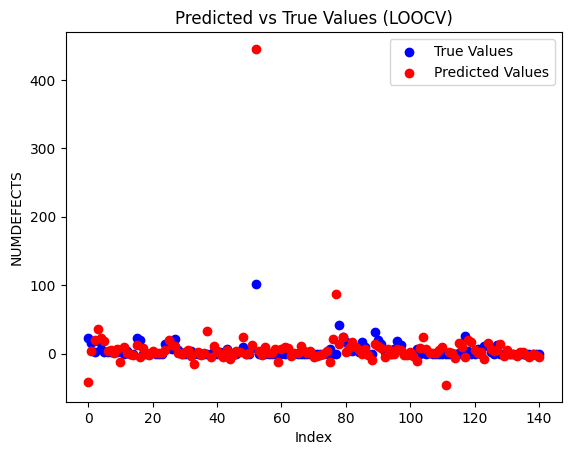

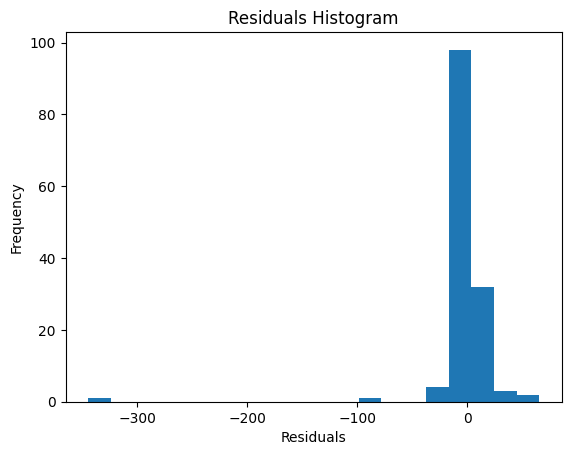


10-fold
Mean MSE: 1036.7023234683816
Mean MAE: 13.50661303419705
Mean R2: -102.12709633496159
RMSE 32.19786209468544


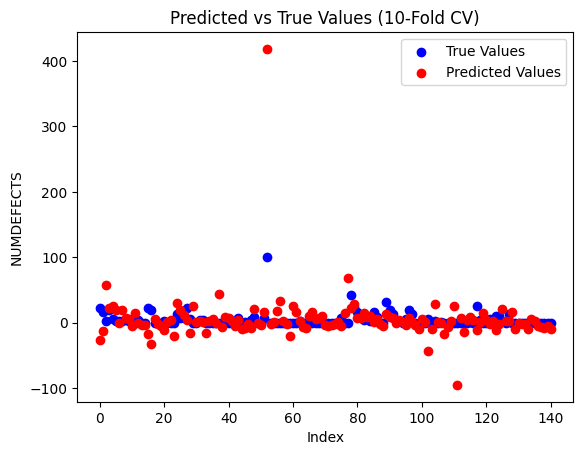

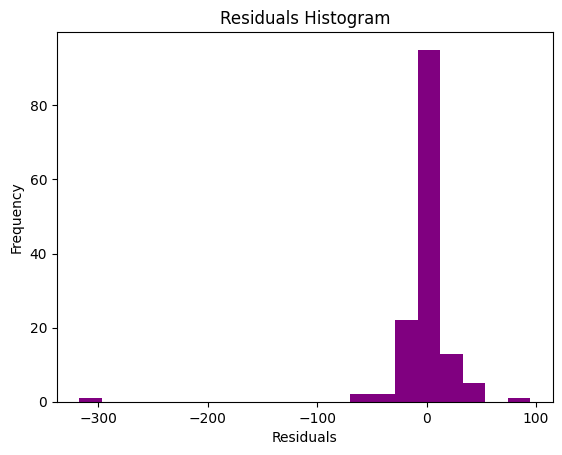

In [2]:
linear_regression = LinearRegression()

print('LOOCV')
loocv(X, y, linear_regression)

print('\n10-fold')
k_fold_cv(X, y, linear_regression, 10)

LOOCV
R squared (LOOCV): -0.05855735958487607
Average MSE (LOOCV): 137.31306757245721
Average RMSE (LOOCV): 11.718065863121662
Average MAE (LOOCV): 7.49776663901326


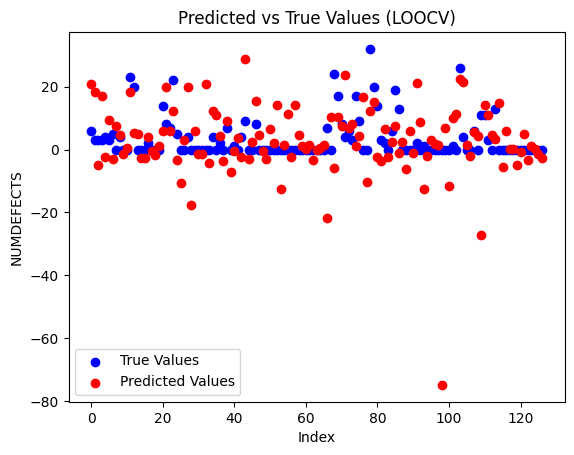

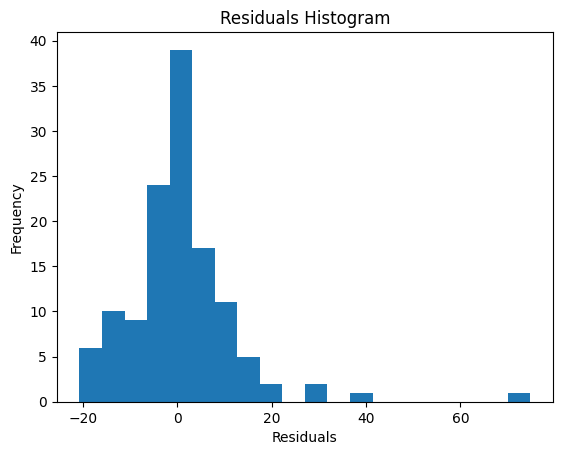


10-fold
Mean MSE: 383.96268265920236
Mean MAE: 13.683290529429895
Mean R2: -17.703809186378596
RMSE 19.594965747844583


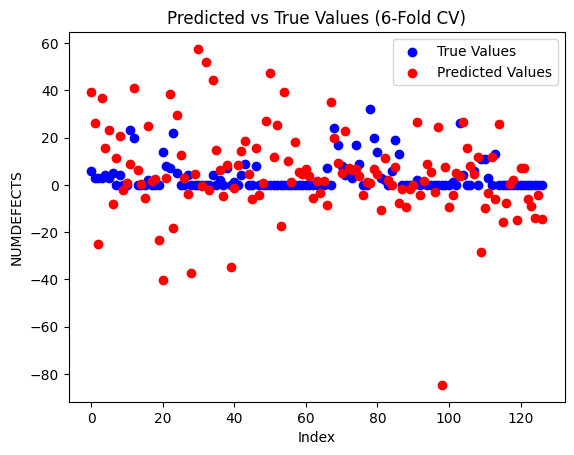

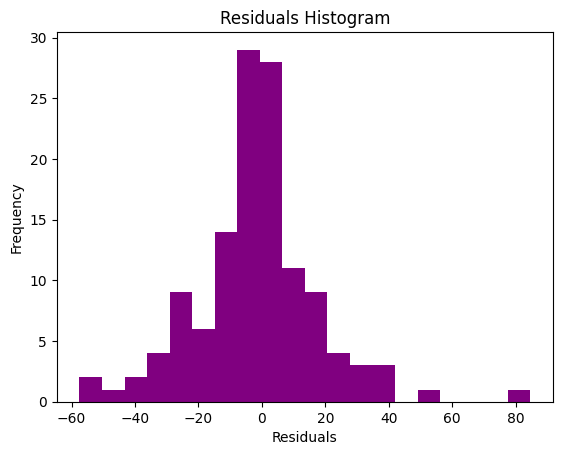

In [3]:
print('LOOCV')
loocv(X_filtered, y_filtered, linear_regression)

print('\n10-fold')
k_fold_cv(X_filtered, y_filtered, linear_regression, 6)